# Life Expectancy and GDP

**Micaela De Feo**, *July 8th, 2023.*

    There has long been interest in and research on the correlation between GDP and life expectancy. The average number of years a person is anticipated to live is known as life expectancy, which is a key indication of a country's general well-being. The GDP, on the other hand, evaluates a nation's economic performance and serves as an indicator for its level of development and living standards. 
    
    In this research, we explore the relationship between GDP and life expectancy in six very different nations: the US, Mexico, China, Germany, Chile, and Zimbabwe. By analyzing these nations, we want to get a better understanding of the intricate processes that result in variations in life expectancy across various economic circumstances. 
    
    I will be covering:
   - Data Wrangling and Tidying
   - Data Manipulation
   - Data Visualization
   - Hypothesis Testing
   - Summarizing Quantitative Data
   - Train Linear Regression Model
    
    The data is from World Health Organization and the World Bank. 

## EDA

In [23]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [61]:
#Checking for missing data
df.isnull().sum()

Country    0
Year       0
LifeExp    0
GDP        0
dtype: int64

In [62]:
#Getting the names of all the countries and values of each one
print(df['Country'].value_counts())

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [63]:
#Checking if there's any duplicates
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool


In [4]:
print(df.describe().round(2))

          Year  Life expectancy at birth (years)           GDP
count    96.00                             96.00  9.600000e+01
mean   2007.50                             72.79  3.880499e+12
std       4.63                             10.67  5.197561e+12
min    2000.00                             44.30  4.415703e+09
25%    2003.75                             74.47  1.733018e+11
50%    2007.50                             76.75  1.280220e+12
75%    2011.25                             78.90  4.067510e+12
max    2015.00                             81.00  1.810000e+13


In [64]:
#Lastly lets check dtypes
print(df.dtypes)

Country     object
Year         int64
LifeExp    float64
GDP        float64
dtype: object


In [6]:
#Rename Life Expectancy column
df.columns = df.columns.str.replace(' ', '')
df.rename(columns = {'Lifeexpectancyatbirth(years)':'LifeExp'}, inplace = True)

## How Life Expectancy and GDP change over time

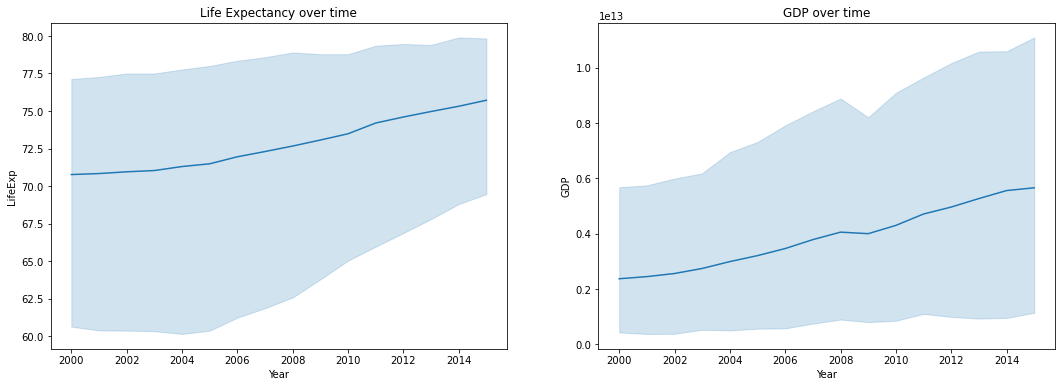

Average Life Expectancy in all nations
Chile: 78.94
China: 74.26
Germany: 79.66
Mexico: 75.72
United States of America: 78.06
Zimbabwe: 50.09


In [88]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
sns.lineplot(data=df, x="Year", y="LifeExp", ax=ax1).set(title='Life Expectancy over time')
sns.lineplot(data=df, x="Year", y="GDP", ax=ax2).set(title='GDP over time')
plt.show()

#Average Life Expectancy in all nations
usa = df[df['Country'] == 'United States of America']
print("Average Life Expectancy in all nations")
print("Chile: " + str(round(np.mean(Chile['LifeExp']), 2)))
print("China: " + str(round(np.mean(China['LifeExp']), 2)))
print("Germany: " + str(round(np.mean(Germany['LifeExp']), 2)))
print("Mexico: " + str(round(np.mean(Mexico['LifeExp']), 2)))
print("United States of America: " + str(round(np.mean(usa['LifeExp']), 2)))
print("Zimbabwe: " + str(round(np.mean(Zimbabwe['LifeExp']), 2)))

## Life Expectancy and GDP by Country

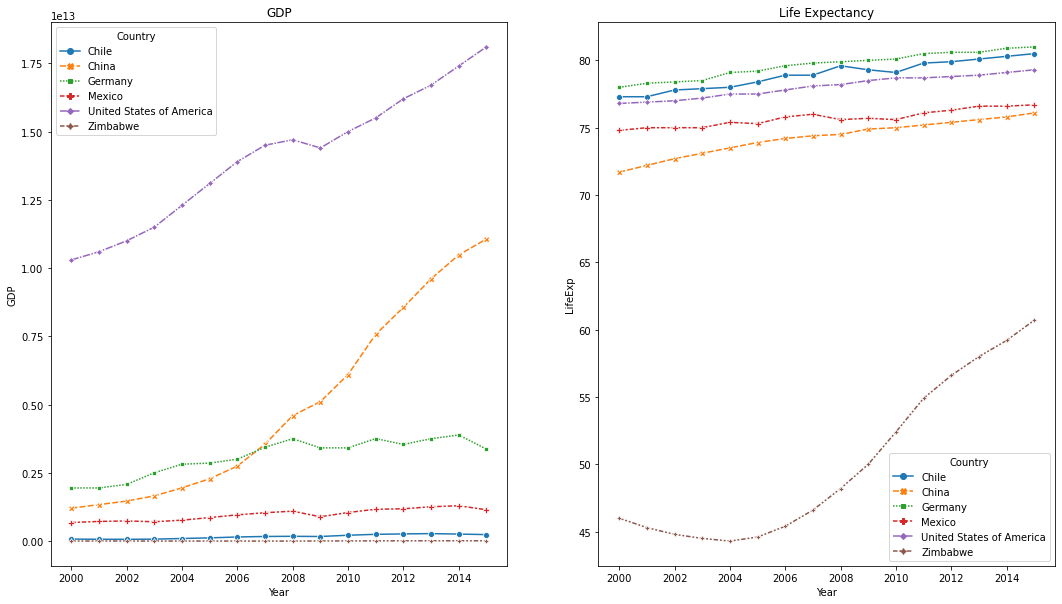

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,10))
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", style="Country", markers=True, ax=ax1).set(title='GDP')
sns.lineplot(data=df, x="Year", y="LifeExp", hue="Country", style="Country", ax=ax2, markers=True).set(title='Life Expectancy')
plt.show()

*Figure 3: The lineplot shows an improvement in GDP across all nations. USA and China had the largest improvements as a result. Germany's recent years have seen stagnation rather than much development. Although the other nations (Mexico, Chile, and Zimbabwe) remained mostly within the same range, it's necessary that we take a look at this independently.*

*Figure 4: In fact, we observe, the average age for individuals in all six nations has risen throughout the years. Zimbabwe experienced a significant change, going from 46 to 61 in 15 years.*


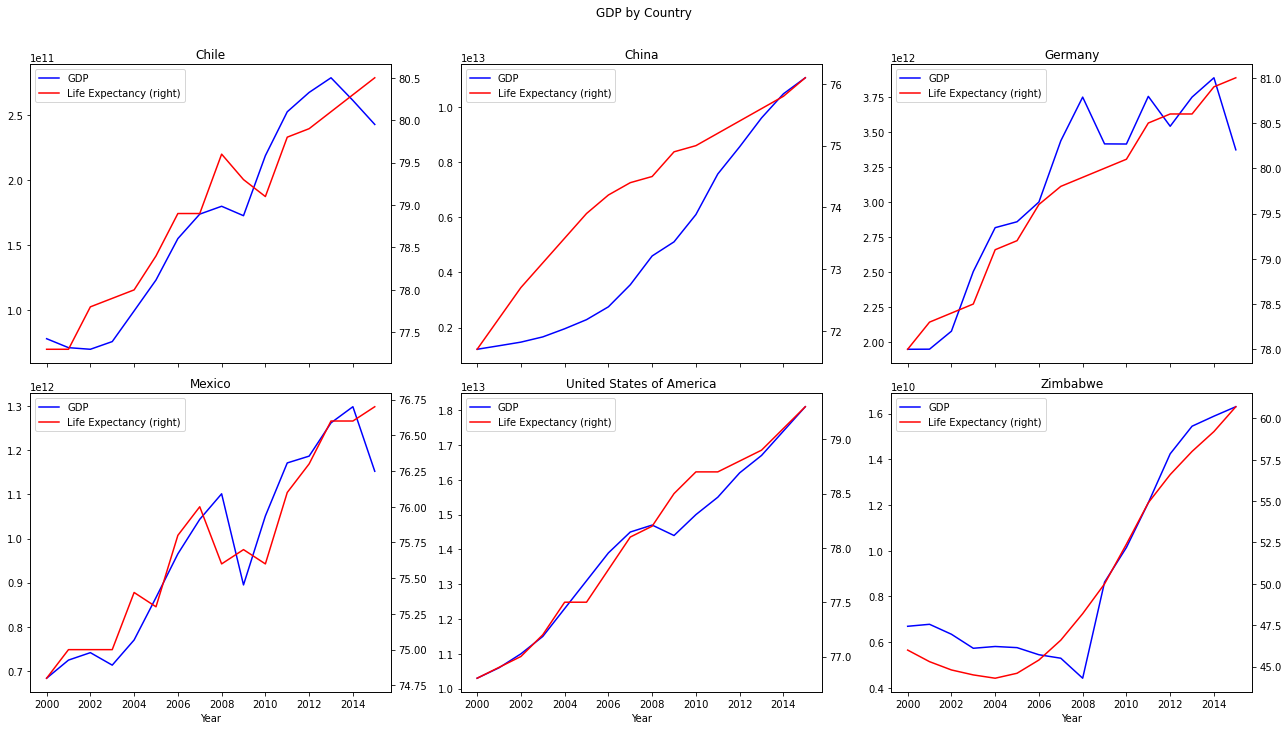

In [22]:
piv = df.pivot(index='Year', columns='Country', values='GDP').reset_index()
piv2 = df.pivot(index='Year', columns='Country', values='LifeExp').reset_index()
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
countries = df.Country.unique()
fig.suptitle('GDP by Country', y=1.01)

piv.plot(ax=axes[0, 0], x='Year', y=countries[0],color='b',label='GDP').set_title(countries[0])
piv2.plot(ax=axes[0, 0], x='Year', y=countries[0],color='r',secondary_y=True, label='Life Expectancy')
piv.plot(ax=axes[0, 1], x='Year', y=countries[1],color='b',label='GDP').set_title(countries[1])
piv2.plot(ax=axes[0, 1], x='Year', y=countries[1],color='r',secondary_y=True, label='Life Expectancy')
piv.plot(ax=axes[0, 2], x='Year', y=countries[2],color='b',label='GDP').set_title(countries[2])
piv2.plot(ax=axes[0, 2], x='Year', y=countries[2],color='r',secondary_y=True, label='Life Expectancy')
piv.plot(ax=axes[1, 0], x='Year', y=countries[3],color='b',label='GDP').set_title(countries[3])
piv2.plot(ax=axes[1, 0], x='Year', y=countries[3],color='r',secondary_y=True, label='Life Expectancy')
piv.plot(ax=axes[1, 1], x='Year', y=countries[4],color='b',label='GDP').set_title(countries[4])
piv2.plot(ax=axes[1, 1], x='Year', y=countries[4],color='r',secondary_y=True, label='Life Expectancy')
piv.plot(ax=axes[1, 2], x='Year', y=countries[5],color='b',label='GDP').set_title(countries[5])
piv2.plot(ax=axes[1, 2], x='Year', y=countries[5],color='r',secondary_y=True, label='Life Expectancy')

plt.tight_layout()

*Figure 5-10: China is the only country in which the trend of both GDP and Life Expectancy does not follow the same path overtime.*

## Correlation between Life Expectancy and GDP

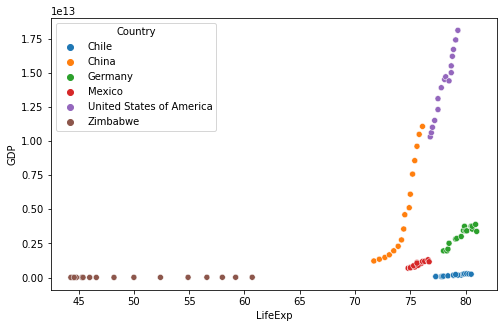

             Year   LifeExp       GDP
Year     1.000000  0.155050  0.208288
LifeExp  0.155050  1.000000  0.343207
GDP      0.208288  0.343207  1.000000


<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="LifeExp", y="GDP", hue="Country")
plt.savefig("scatterplot.png")
plt.show()
plt.clf()

# Correlation overall
correlation = df.corr()
print(correlation)

In [92]:
#Correlation between points and assists, grouped by team
df.groupby('Country')[['LifeExp','GDP']].corr().unstack().iloc[:,1]

Country
Chile                       0.949877
China                       0.908526
Germany                     0.932699
Mexico                      0.932238
United States of America    0.981709
Zimbabwe                    0.966200
Name: (LifeExp, GDP), dtype: float64

There is a high correlation between a country's GDP and their life expectancy. We have an overall correlation of 34%, but if we analyze and observe every country's correlation, is about 95%. The lowest correlation from China with 90% and the highest from USA with 98%.

# Linear regression model and train data

In [93]:
us = df[df.Country=='United States of America']
X_trainu = us.iloc[:,1:3]
y_trainu = us.iloc[:,3]
true_2021u = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021], 'LifeExp':[78.86,78.84,78.81,78.87,78.93,78.99],'GDP':[1.847e13,1.924e13,2.024e13,2.111e13,2.156e13,2.206e13]}, index={0,1,2,3,4,5})
X_testu=true_2021u.iloc[:,:2]
y_testu = true_2021u.iloc[:,2]

In [94]:
gr = df[df.Country=='Germany']
X_traing = gr.iloc[:,1:3]
y_traing = gr.iloc[:,3]
true_2021g = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021], 'LifeExp':[80.84,80.97,81.1,81.26,81.41,81.57],'GDP':[3.469e12,3.681e12,3.966e12,3.861e12,3.803e12,4.319e12]}, index={0,1,2,3,4,5})
X_testg=true_2021g.iloc[:,:2]
y_testg = true_2021g.iloc[:,2]

In [95]:
scl = StandardScaler()

X_train_su = scl.fit_transform(X_trainu)
X_test_su = scl.transform(X_testu)

X_trainsu = pd.DataFrame(X_train_su, columns=X_trainu.columns, index=X_trainu.index)
X_testsu=pd.DataFrame(X_test_su, columns=X_testu.columns, index=X_testu.index)

X_train_sg = scl.fit_transform(X_traing)
X_test_sg = scl.transform(X_testg)

X_trainsg = pd.DataFrame(X_train_sg, columns=X_traing.columns, index=X_traing.index)
X_testsg=pd.DataFrame(X_test_sg, columns=X_testg.columns, index=X_testg.index)

In [96]:
reg = LinearRegression().fit(X_trainsu, y_trainu)
reg.score(X_trainsu,y_trainu)
y_pred_us = reg.predict(X_testsu)
print('r-squared score for United States is {}'.format(reg.score(X_trainsu,y_trainu)))

reg = LinearRegression().fit(X_trainsg, y_traing)
reg.score(X_trainsg,y_traing)
y_pred_gr = reg.predict(X_testsg)
print('r-squared score for Germany is {}'.format(reg.score(X_trainsg,y_traing)))

r-squared score for United States is 0.9802277790311855
r-squared score for Germany is 0.8981129849157656


Text(0.5, 1.0, 'Germany')

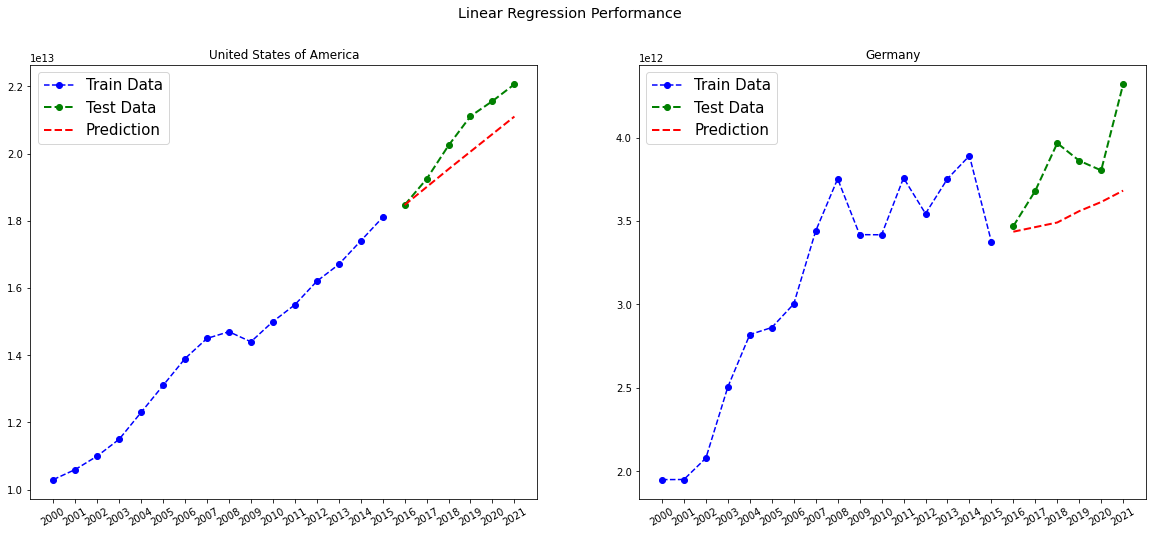

In [97]:
fig, axes = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Linear Regression Performance',fontsize='x-large')
axes[0].plot(np.array(us.Year),np.array(us.GDP),color='b',label='Train Data', linestyle='dashed',marker='o')
axes[0].plot(np.array(true_2021u.Year),np.array(true_2021u.GDP),linestyle='dashed',marker='o',color='g',linewidth=2,label='Test Data')
axes[0].plot(true_2021u.Year,y_pred_us, color = 'r',linestyle='dashed', label='Prediction',linewidth=2)
axes[1].plot(np.array(gr.Year),np.array(gr.GDP),color='b',label='Train Data',linestyle='dashed',marker='o')
axes[1].plot(np.array(true_2021g.Year),np.array(true_2021g.GDP),linestyle='dashed',marker='o',linewidth=2,color='g', label='Test Data')
axes[1].plot(true_2021g.Year,y_pred_gr, color = 'r',linestyle='dashed', label='Prediction',linewidth=2)

axes[0].set_xticks(np.append(np.array(us.Year),true_2021u.Year))
axes[0].set_xticklabels(np.append(np.array(us.Year),true_2021u.Year), rotation=30)
axes[0].legend(loc='upper left', prop={'size': 15})
axes[0].set_title('United States of America')
axes[1].set_xticks(np.append(np.array(gr.Year),true_2021u.Year))
axes[1].set_xticklabels(np.append(np.array(gr.Year),true_2021u.Year), rotation=30)
axes[1].legend(loc='upper left', prop={'size': 15})
axes[1].set_title('Germany')

Linear regression underestimates GDP in both United States and Germany.

# Conclusion

    Our analysis reveals the complex relationship between GDP and life expectancy in six different nations. The results of our investigation show that, while economic prosperity, as measured by GDP, is typically associated with higher life expectancy, it isn't often the case (for instance, in China), and that additionally socio-cultural, political, and healthcare-related factors also play pivotal roles. 
    
    Germany stands out as an outstanding example for having a high life expectancy and a healthy GDP, highlighting the importance of having effective healthcare systems and social policies. There is a need to address health inequities and enhance overall wellbeing, given the difficulties encountered by nations like Zimbabwe, where the GDP has a significant impact on life expectancy. 
    
    By deepening our understanding of the relationship between life expectancy and GDP in these diverse contexts, we can inform policies and interventions aimed at fostering healthier and more prosperous societies.